# DBSCAN Project: GPS-Based Tourist Spot Clustering
🎯 Problem Statement:
A tourism company wants to identify natural groupings of tourist locations based on GPS coordinates (latitude & longitude), so it can plan tour packages or group attractions together.

DBSCAN is perfect for geospatial data, where distance-based clustering and noise detection are important.

# Dataset features:
| Feature     | Description               |
| ----------- | ------------------------- |
| `latitude`  | Latitude of tourist spot  |
| `longitude` | Longitude of tourist spot |

We simulate fake GPS points around 3 cities + some noise.



In [1]:
# Create Dataset (Simulated)
import pandas as pd
import numpy as np

np.random.seed(42)

# Simulated tourist spots around 3 city centers + noise
city1 = np.random.normal(loc=[12.97, 77.59], scale=0.02, size=(10, 2))  # Bangalore
city2 = np.random.normal(loc=[28.61, 77.20], scale=0.02, size=(10, 2))  # Delhi
city3 = np.random.normal(loc=[19.07, 72.87], scale=0.02, size=(10, 2))  # Mumbai
noise = np.random.uniform(low=[10, 70], high=[30, 80], size=(5, 2))     # random noise

data = np.vstack([city1, city2, city3, noise])
df = pd.DataFrame(data, columns=["latitude", "longitude"])
df.head()


,latitude,longitude
0,12.979934,77.587235
1,12.982954,77.620461
2,12.965317,77.585317
3,13.001584,77.605349
4,12.960611,77.600851


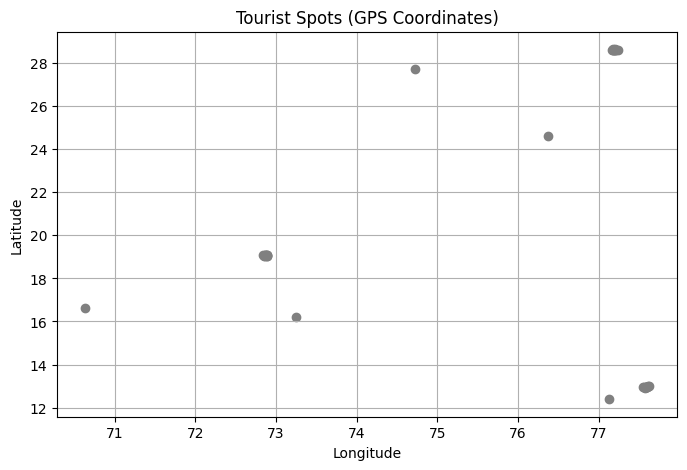

In [2]:
# Visualize Raw GPS Points
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['longitude'], df['latitude'], c='gray')
plt.title("Tourist Spots (GPS Coordinates)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()


# Fit DBSCAN Model
DBSCAN has 2 key parameters:

- eps: max distance for two points to be considered in same neighborhood

- min_samples: minimum number of neighbors for a point to be a core point


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale features (important for distance-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

db = DBSCAN(eps=0.5, min_samples=3)  # you can tune these
db.fit(X_scaled)

df['cluster'] = db.labels_  # -1 means noise


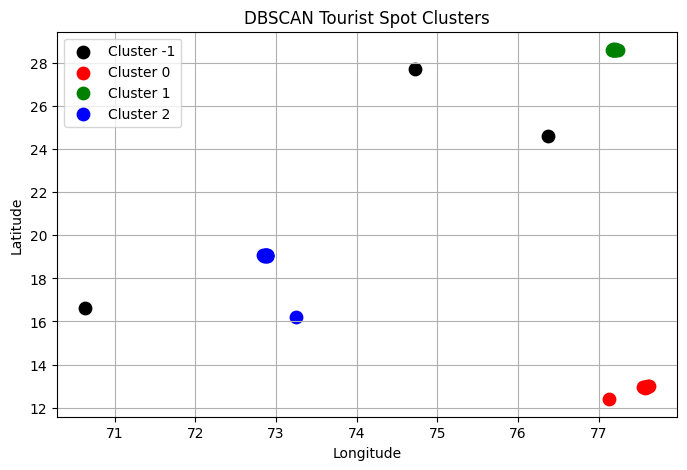

In [5]:
# Visualize Clusters
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']
for label in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == label]
    color = 'black' if label == -1 else colors[label % len(colors)]
    plt.scatter(subset['longitude'], subset['latitude'], label=f"Cluster {label}", c=color, s=80)

plt.title("DBSCAN Tourist Spot Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid()
plt.show()



In [6]:
# Results Summary
print("Clusters formed (excluding noise):", len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
print("Noise points detected:", sum(df['cluster'] == -1))



Clusters formed (excluding noise): 3
Noise points detected: 3


| Strength                                   | Why It Helps                        |
| ------------------------------------------ | ----------------------------------- |
| 🔍 Auto-detects number of clusters         | No need to guess `k` like K-Means   |
| 💥 Detects noise                           | Great for anomaly/outlier detection |
| 🔄 Handles irregular shapes                | Not limited to spherical clusters   |
| 📏 Works well with distance-based features | Like GPS, proximity, or vectors     |

| Limitation                            | Why It Matters                                       |
| ------------------------------------- | ---------------------------------------------------- |
| ❌ Needs tuning (`eps`, `min_samples`) | Sensitive to these values                            |
| 🧪 Struggles in varying density data  | Can’t handle clusters with different densities       |
| 🐌 Slow on large datasets             | Especially if high-dimensional                       |
| 🧠 No centroid or interpretability    | Just assigns clusters, no cluster center like KMeans |


Real-World Use Cases
📍 GPS-based place clustering (tourism, food delivery)

💳 Fraud detection (outlier transactions)

📡 Anomaly detection in IoT sensor data

🔎 Document and image deduplication


| Step      | Description                                      |
| --------- | ------------------------------------------------ |
| Goal      | Cluster tourist spots based on GPS data          |
| Algorithm | DBSCAN (Density-Based Clustering)                |
| Output    | Cluster labels & outlier detection               |
| Insights  | Detected natural clusters without specifying `k` |
